In [142]:
import requests
import pandas as pd

In [143]:
url = f'https://graph.instagram.com/me/media?fields=id,caption,media_type,media_url,timestamp&access_token=IGQWRONmdaelNlOTB3cjFzcTFTd25tLUloYWRySHg4SlhicmlFSW5OV1pWcnNYU2YtYkNkSFJWTThwcnpNTW02d19ZATzVrMUJrMVFpcXpFYm5JeDFfODFDaDdfQkRDMHJuOXpXd0c2VE1Ta3JBb1lHalpUUG5PTDgZD'

In [144]:
access_token='IGQWRONmdaelNlOTB3cjFzcTFTd25tLUloYWRySHg4SlhicmlFSW5OV1pWcnNYU2YtYkNkSFJWTThwcnpNTW02d19ZATzVrMUJrMVFpcXpFYm5JeDFfODFDaDdfQkRDMHJuOXpXd0c2VE1Ta3JBb1lHalpUUG5PTDgZD'

In [145]:
response = requests.get(url)

In [146]:
if response.status_code == 200:
    data = response.json()
else:
    print("Error making the API request:", response.text)
    data = None

In [147]:
data

{'data': [{'id': '18227088265280124',
   'caption': "I wish I could see a way out, but the path forward is so unclear. I know I have to keep moving, but some days it's just too hard. The silence can be deafening, and I often find myself wishing for a sign, something to show me that I'm not alone in this. I keep hoping that tomorrow will be better, but each new day feels like a rerun of the last. I just want to feel something again.",
   'media_type': 'IMAGE',
   'media_url': 'https://scontent.cdninstagram.com/v/t51.29350-15/441248127_1158973988624621_3187270308235607167_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=18de74&_nc_ohc=1heq8_CtWDQQ7kNvgFYx_Zi&_nc_oc=Adg8xSfA1nci3vRv4qhLej4pvAU9YNlQmzfLhsQ6BHZuKSi6uazt8VO5qCVYwWV-k0U&_nc_ht=scontent.cdninstagram.com&edm=ANo9K5cEAAAA&oh=00_AfAdqwCC9GB_d_ErK8snpbQZzspSH1CbtEbE4tz7hX-vug&oe=6640F528',
   'timestamp': '2024-05-04T13:05:43+0000'},
  {'id': '18001978385605323',
   'caption': "There’s an emptiness that follows when a relationship falls apart. T

In [148]:
if data:
    df = pd.DataFrame(data['data'])  # Assuming 'data' is a dictionary containing 'data' key with a list of records
else:
    df = pd.DataFrame(columns=['id', 'caption','mediatype','media_url','timestamp'])


In [149]:
print(df)

                  id                                            caption  \
0  18227088265280124  I wish I could see a way out, but the path for...   
1  18001978385605323  There’s an emptiness that follows when a relat...   
2  18028155728062543  Life often feels like an uphill climb, with no...   
3  18063719863538580  The bottle seemed like a quick escape from my ...   
4  18008219390203733  What started as a game turned into something d...   
5  18014434958096049  When you find out she thought you were playing...   
6  18019842629009943  Dreams are like fragile threads, easily broken...   
7  18049687408639342                           It gets tougher everyday   

  media_type                                          media_url  \
0      IMAGE  https://scontent.cdninstagram.com/v/t51.29350-...   
1      IMAGE  https://scontent.cdninstagram.com/v/t51.29350-...   
2      IMAGE  https://scontent.cdninstagram.com/v/t51.29350-...   
3      IMAGE  https://scontent.cdninstagram.com/v/t51.29

In [150]:
df.to_csv('instagram_data.csv', index=False)

In [151]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.models import Model

from keras.layers import Embedding, Bidirectional, LSTM, Dense, Input, Concatenate, Dot, Activation

In [152]:
from ocr import get_text

In [153]:
training_data = pd.read_csv('training_data.csv')

In [154]:
instagram_data = pd.read_csv('instagram_data.csv')


In [155]:
def fetch_carousel_items(album_id, access_token):
    album_url = f'https://graph.instagram.com/media/{album_id}/children?fields=id,media_type,media_url,caption&access_token={access_token}'
    response = requests.get(album_url)

    if response.status_code != 200:
        print("Error fetching album data:", response.text)
        return None

    return response.json()

In [156]:
new_data = []
for index, row in df.iterrows():
    new_row = {'id': row['id'], 'timestamp': row['timestamp']}
    flag = 0
    if row['media_type'] == 'IMAGE':
        # Perform OCR on the image URL
        ocr_text = get_text(row['media_url'])
        if ocr_text:
            new_row['text'] = ocr_text
            flag = 1
        else:
        # Use caption as text
            new_row['text'] = row['caption']    
    else:
        # Use caption as text
        new_row['text'] = row['caption']
    new_data.append(new_row)
    if flag == 1:
        new_row_2 = {'id': row['id'], 'timestamp': row['timestamp'],'text':row['caption']}
        new_data.append(new_row_2)

# Create new DataFrame
new_df = pd.DataFrame(new_data)
print(new_df)

                   id                 timestamp  \
0   18227088265280124  2024-05-04T13:05:43+0000   
1   18227088265280124  2024-05-04T13:05:43+0000   
2   18001978385605323  2024-05-04T13:05:02+0000   
3   18001978385605323  2024-05-04T13:05:02+0000   
4   18028155728062543  2024-05-04T13:01:15+0000   
5   18028155728062543  2024-05-04T13:01:15+0000   
6   18063719863538580  2024-05-04T12:53:06+0000   
7   18063719863538580  2024-05-04T12:53:06+0000   
8   18008219390203733  2024-05-04T12:52:00+0000   
9   18008219390203733  2024-05-04T12:52:00+0000   
10  18014434958096049  2024-05-04T12:50:31+0000   
11  18014434958096049  2024-05-04T12:50:31+0000   
12  18019842629009943  2024-05-04T12:48:04+0000   
13  18019842629009943  2024-05-04T12:48:04+0000   
14  18049687408639342  2024-05-04T10:29:34+0000   
15  18049687408639342  2024-05-04T10:29:34+0000   

                                                 text  
0   66\n\nlam bent, but not broken. |\nam scarred,...  
1   I wish I could s

In [157]:
new_df.to_csv('test.csv')

In [158]:
new_df.dropna(subset=['text'], inplace=True)
X_train = training_data['caption'].astype(str)
y_train = training_data['depression_label']
X_test = new_df['text'].astype(str)

In [159]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [160]:
max_len = 100  # Define your maximum sequence length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [161]:
input_layer = Input(shape=(max_len,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=100)(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention = Dense(1, activation='tanh')(lstm_layer)
attention = Activation('sigmoid')(attention)
context = Dot(axes=1)([attention, lstm_layer])
output_layer = Dense(1, activation='sigmoid')(context)

model = Model(inputs=[input_layer], outputs=output_layer)

In [162]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [163]:
model.fit(X_train_pad, y_train, epochs=10, batch_size=64)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - accuracy: 0.8288 - loss: 0.4620
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - accuracy: 0.9530 - loss: 0.2192
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9770 - loss: 0.0797
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9817 - loss: 0.0679
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9902 - loss: 0.0326
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.9921 - loss: 0.0277
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.9945 - loss: 0.0194
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9964 - loss: 0.0156
Epoch 9/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9962 - loss: 0.0117
Epoch 10/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9963 - loss: 0.0125


In [164]:
predicted_labels = model.predict(X_test_pad)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


In [165]:
new_df['predicted_depression_label'] = predicted_labels.reshape(-1)


In [166]:
depressing_captions = new_df[new_df['predicted_depression_label'] > 0.9]['text']

depression_text_with_one = new_df[new_df['predicted_depression_label'] == 1]['text'].iloc[0] if not new_df[new_df['predicted_depression_label'] == 1].empty else None

if depression_text_with_one is not None:
    print("\nDepression text with label 1:")
    print(depression_text_with_one)
else:
    print("\nNo text with predicted depression label equal to 1 found.")



Depression text with label 1:
66

lam bent, but not broken. |
am scarred, but not
disfigured. | am sad, but not
hopeless. | am tired, but not
powerless. | am angry, but
not bitter. | am depressed,
but not giving up

A HopeQure



In [167]:
for text in depressing_captions:
    print(text)


66

lam bent, but not broken. |
am scarred, but not
disfigured. | am sad, but not
hopeless. | am tired, but not
powerless. | am angry, but
not bitter. | am depressed,
but not giving up

A HopeQure

There’s an emptiness that follows when a relationship falls apart. The shared jokes, the familiar routines, the dreams you had for the future—all of it suddenly feels out of reach. I often wonder if I'll ever find that kind of connection again or if I'm destined to keep repeating the same mistakes. I know that healing takes time, but some days, it feels like the pain will never go away. All I can do is keep moving forward and hope that, someday, things will start to feel better.
0. Xa Se St. AS MN
®6

Tears are words the
mouth can't say nor
can the heart bear.

JOSHUA WISENBAKER


Life often feels like an uphill climb, with no clear end in sight. Every day brings a new set of challenges, and sometimes it feels like I'm stuck in a cycle that never seems to break. The weight of expectations, b

In [168]:
%pip install openai==0.28
import openai
import os
openai.api_key = 'sk-proj-IPbGPNkM8nVpAlrGsOUDT3BlbkFJ6D95tf12G0WraqNUNTCo'


def get_gpt_response(text):
    # Create a messages list for the Chat Completion API
    messages = [
        {
            "role": "system",
            "content": "You are a helpful assistant that provides compassionate responses and includes links to online mental health resources."
        },
        {
            "role": "user",
            "content": f"The following text expresses feelings of sadness or depression:\n{text}\n"
        }
    ]
    

    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=messages,
        temperature=0.7,  
        max_tokens=100,  
        top_p=1.0,  
        frequency_penalty=0,  
        presence_penalty=0  
    )
    
   
    generated_response = response.choices[0].message['content']
    

    print("Generated Response:")
    print(generated_response)
    

    return generated_response


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [169]:
response = get_gpt_response(text)

Generated Response:
I'm sorry to hear that you're feeling this way. It sounds like you're going through a very difficult time. Please know that you're not alone, and there are people who care about you and want to help. It's important to reach out for support during challenging times.

If you're comfortable, talking to a mental health professional can be very beneficial. They can provide guidance and support to help you navigate through these tough emotions. In the meantime, if you're in crisis or need immediate


In [170]:
print(response)

I'm sorry to hear that you're feeling this way. It sounds like you're going through a very difficult time. Please know that you're not alone, and there are people who care about you and want to help. It's important to reach out for support during challenging times.

If you're comfortable, talking to a mental health professional can be very beneficial. They can provide guidance and support to help you navigate through these tough emotions. In the meantime, if you're in crisis or need immediate


In [171]:
print(predicted_labels)

[[[1.0000000e+00]]

 [[8.4669417e-01]]

 [[3.3616358e-01]]

 [[1.0000000e+00]]

 [[9.2857379e-01]]

 [[1.0000000e+00]]

 [[9.9999636e-01]]

 [[9.9998075e-01]]

 [[4.4741797e-01]]

 [[1.0000000e+00]]

 [[1.0000000e+00]]

 [[5.0991603e-05]]

 [[9.2766601e-01]]

 [[3.7840772e-01]]

 [[1.0000000e+00]]

 [[1.9889292e-01]]]


In [172]:
new_df

,id,timestamp,text,predicted_depression_label
0,18227088265280124,2024-05-04T13:05:43+0000,"66\n\nlam bent, but not broken. |\nam scarred,...",1.000000
1,18227088265280124,2024-05-04T13:05:43+0000,"I wish I could see a way out, but the path for...",0.846694
2,18001978385605323,2024-05-04T13:05:02+0000,(i\n\n“Relationships are like —\nglass. Someti...,0.336164
3,18001978385605323,2024-05-04T13:05:02+0000,There’s an emptiness that follows when a relat...,1.000000
4,18028155728062543,2024-05-04T13:01:15+0000,0. Xa Se St. AS MN\n®6\n\nTears are words the\...,0.928574
5,18028155728062543,2024-05-04T13:01:15+0000,"Life often feels like an uphill climb, with no...",1.000000
6,18063719863538580,2024-05-04T12:53:06+0000,It’s not always the\ntears that measure the\np...,0.999996
7,18063719863538580,2024-05-04T12:53:06+0000,The bottle seemed like a quick escape from my ...,0.999981
8,18008219390203733,2024-05-04T12:52:00+0000,"66\nKeeping a lot to\nmyself, because\nit is h...",0.447418
9,18008219390203733,2024-05-04T12:52:00+0000,What started as a game turned into something d...,1.000000


In [173]:
new_df.to_csv('forpurp.csv')

In [174]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping
import numpy as np


training_data = pd.read_csv('training_data.csv')

X_train = training_data['caption'].astype(str)
y_train = training_data['depression_label']


X_train_seq = tokenizer.texts_to_sequences(X_train)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  
cross_val_results = []

for train_index, val_index in kf.split(X_train_pad):
    X_train_fold, X_val_fold = X_train_pad[train_index], X_train_pad[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = Model(inputs=[input_layer], outputs=output_layer)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

    history = model.fit(
        X_train_fold,
        y_train_fold,
        validation_data=(X_val_fold, y_val_fold),
        epochs=10,
        batch_size=64,
        callbacks=[early_stopping],
    )

    cross_val_results.append((history.history['val_loss'][-1], history.history['val_accuracy'][-1]))

print("Cross-Validation Results:")
for i, result in enumerate(cross_val_results):
    print(f"Fold {i + 1}: Loss = {result[0]}, Accuracy = {result[1]}")


Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9930 - loss: 0.0285 - val_accuracy: 0.9935 - val_loss: 0.0204
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9954 - loss: 0.0158 - val_accuracy: 0.9968 - val_loss: 0.0113
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9977 - loss: 0.0092 - val_accuracy: 0.9948 - val_loss: 0.0160
Epoch 4/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9978 - loss: 0.0074 - val_accuracy: 0.9864 - val_loss: 0.0611
Epoch 5/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9976 - loss: 0.0054 - val_accuracy: 0.9916 - val_loss: 0.0162
Epoch 5: early stopping
Epoch 1/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.9977 - loss: 0.0103 - val_accuracy: 0.9987 - val_loss: 0.0034
Epoch 2/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 0.9987 - val_loss: 0.0033
Epoch 3/10
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9990 - loss: 0.0027 - 

In [175]:

# Manual review
num_samples = 10  
sampled_df = new_df.sample(num_samples, random_state=42)

for index, row in sampled_df.iterrows():
    print(f"Caption: {row['text']}")
    print(f"Predicted Depression Label: {row['predicted_depression_label']}")


Caption: 66

lam bent, but not broken. |
am scarred, but not
disfigured. | am sad, but not
hopeless. | am tired, but not
powerless. | am angry, but
not bitter. | am depressed,
but not giving up

A HopeQure

Predicted Depression Label: 1.0
Caption: I wish I could see a way out, but the path forward is so unclear. I know I have to keep moving, but some days it's just too hard. The silence can be deafening, and I often find myself wishing for a sign, something to show me that I'm not alone in this. I keep hoping that tomorrow will be better, but each new day feels like a rerun of the last. I just want to feel something again.
Predicted Depression Label: 0.8466941714286804
Caption: Life often feels like an uphill climb, with no clear end in sight. Every day brings a new set of challenges, and sometimes it feels like I'm stuck in a cycle that never seems to break. The weight of expectations, both my own and those of others, can be so crushing. It's hard to breathe when every step feels like

In [176]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_train = (model.predict(X_train_pad) > 0.5).astype(int).reshape(-1)

accuracy = accuracy_score(y_train, y_pred_train)
precision = precision_score(y_train, y_pred_train)
recall = recall_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

cm = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:")
print(cm)


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Confusion Matrix:
[[3899    1]
 [   1 3830]]


In [177]:
import random

# Introduce noise into the training data
noisy_data = X_train + ' ' + pd.Series([''.join(random.choices('abcdefghijklmnopqrstuvwxyz', k=10)) for _ in range(len(X_train))])

# Re-tokenize and re-pad with the noisy data
noisy_data_seq = tokenizer.texts_to_sequences(noisy_data)
noisy_data_pad = pad_sequences(noisy_data_seq, maxlen=max_len, padding='post')

# Predict with the noisy data
y_pred_noisy = (model.predict(noisy_data_pad) > 0.5).astype(int).reshape(-1)

# Calculate metrics for the noisy data
accuracy_noisy = accuracy_score(y_train, y_pred_noisy)
precision_noisy = precision_score(y_train, y_pred_noisy)
recall_noisy = recall_score(y_train, y_pred_noisy)
f1_noisy = f1_score(y_train, y_pred_noisy)

print("Metrics with Noisy Data:")
print(f"Accuracy: {accuracy_noisy:.2f}")
print(f"Precision: {precision_noisy:.2f}")
print(f"Recall: {recall_noisy:.2f}")
print(f"F1-Score: {f1_noisy:.2f}")


242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Metrics with Noisy Data:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


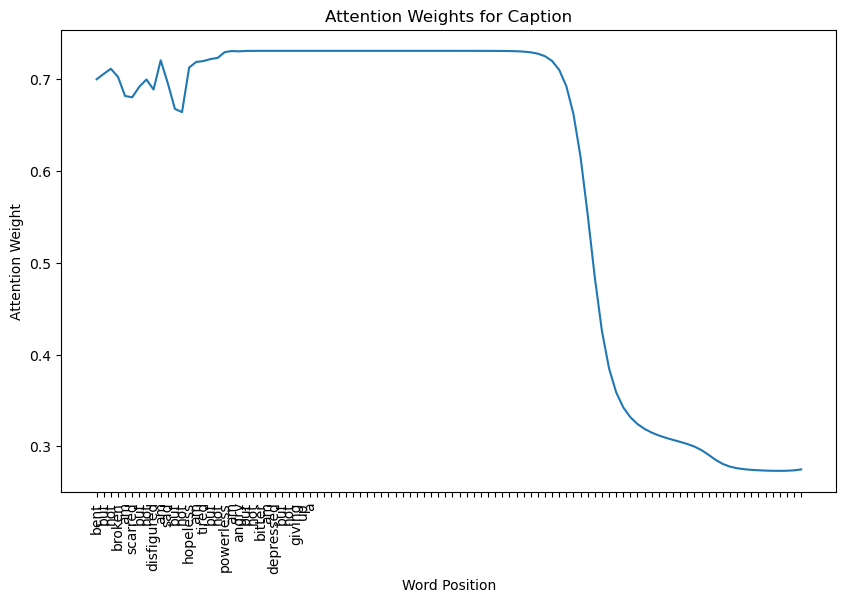

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


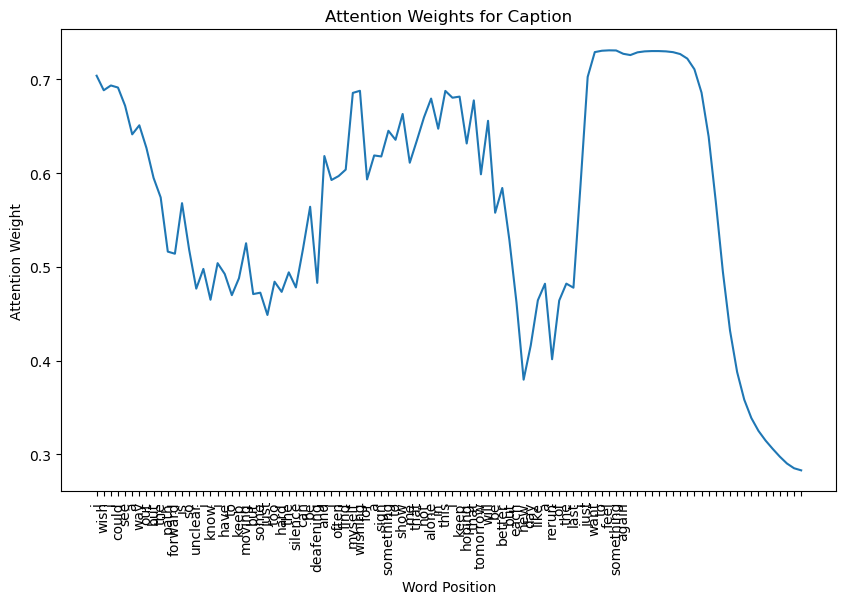

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


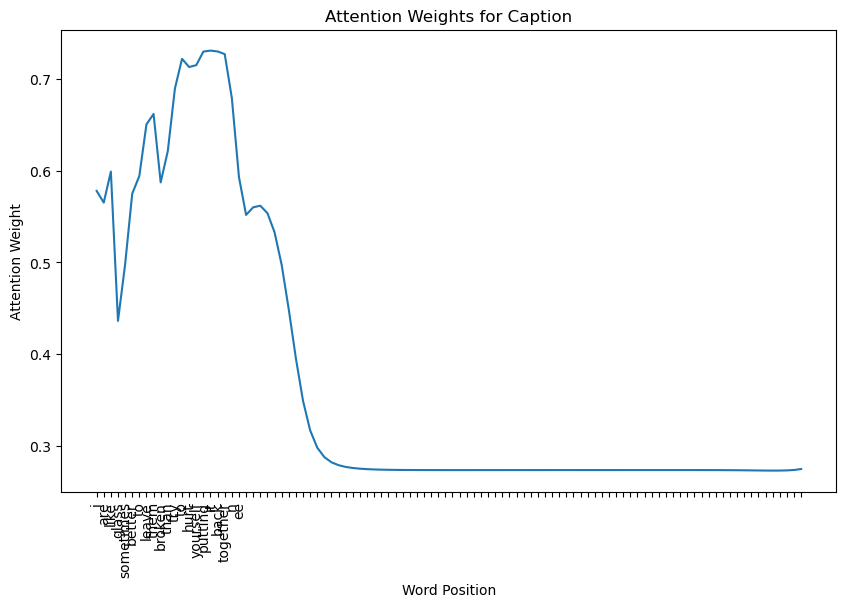

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


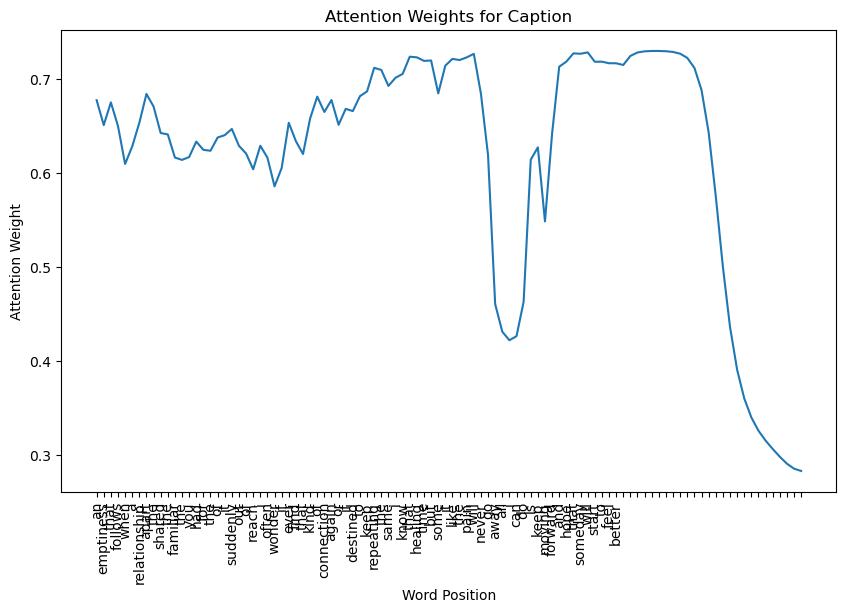

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


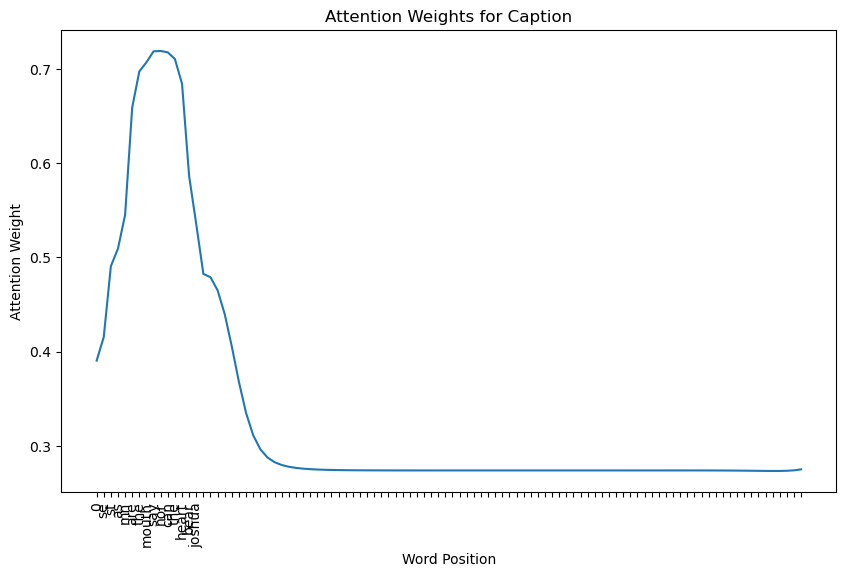

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


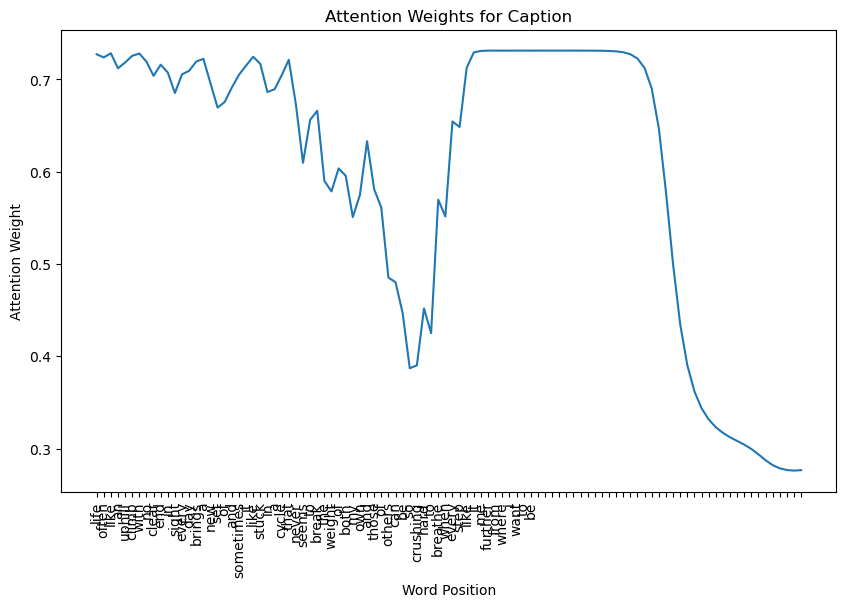

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


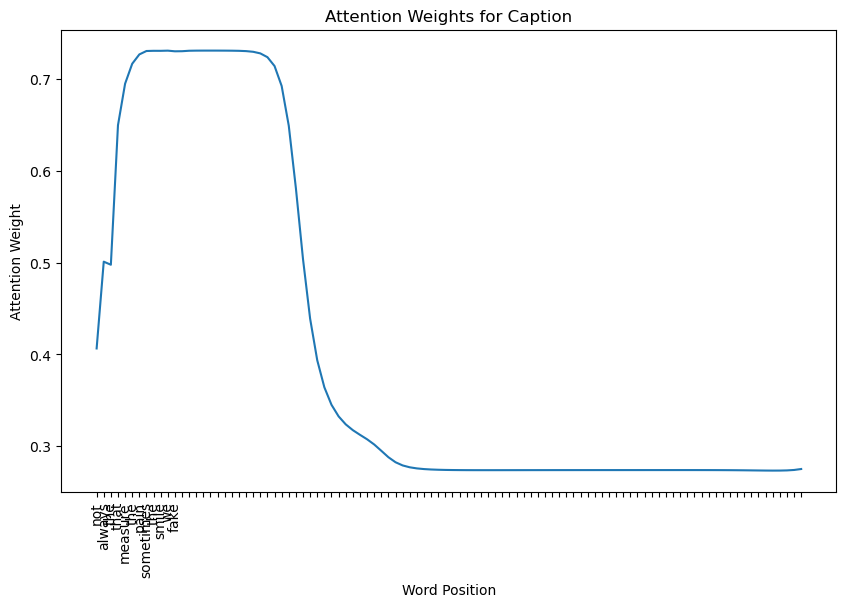

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


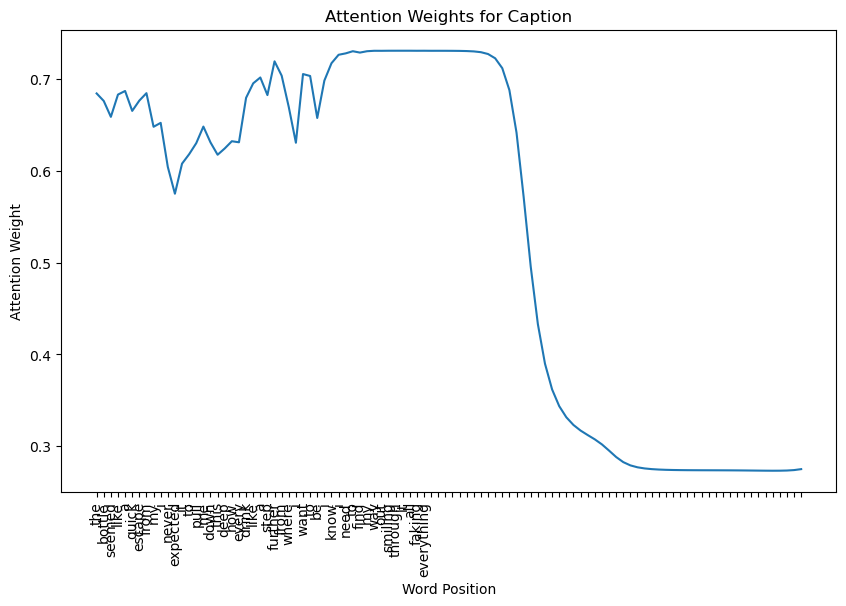

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


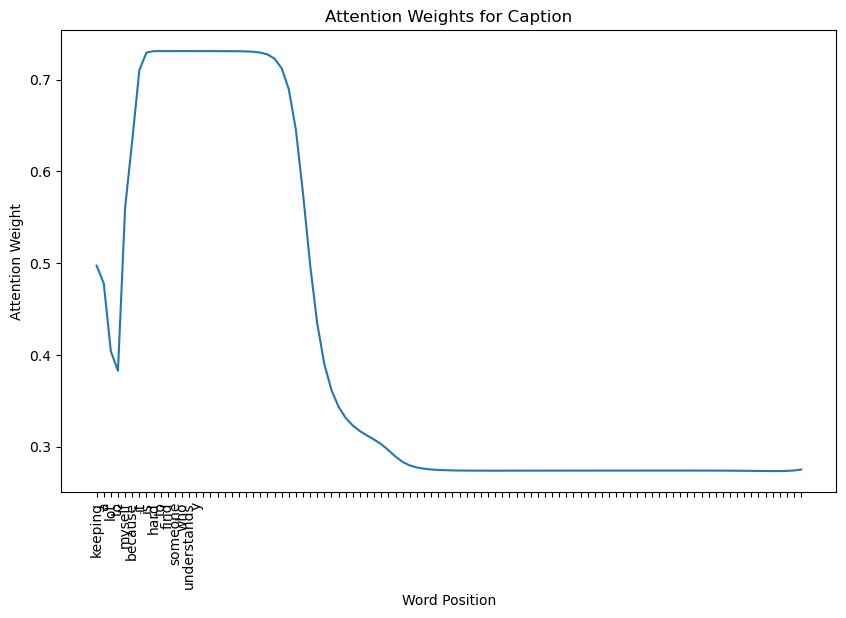

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


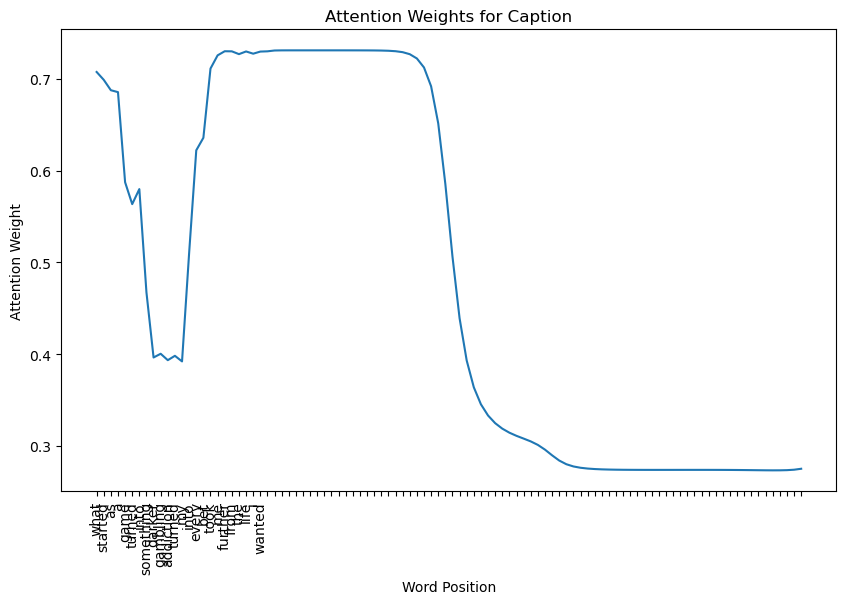

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


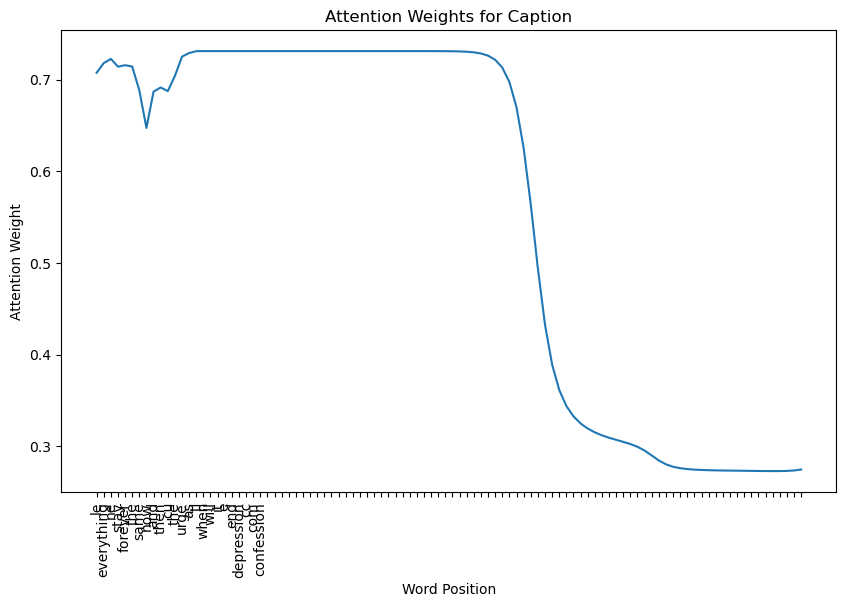

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


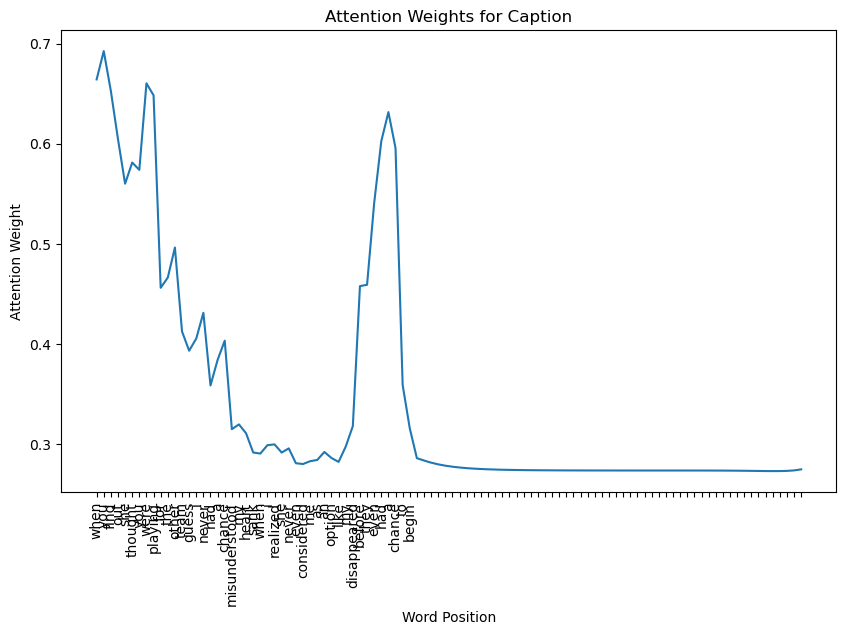

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


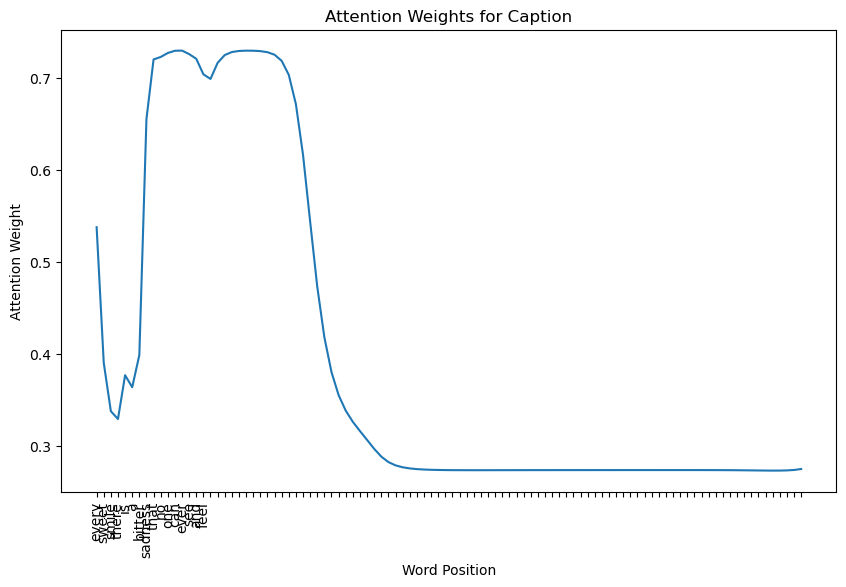

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


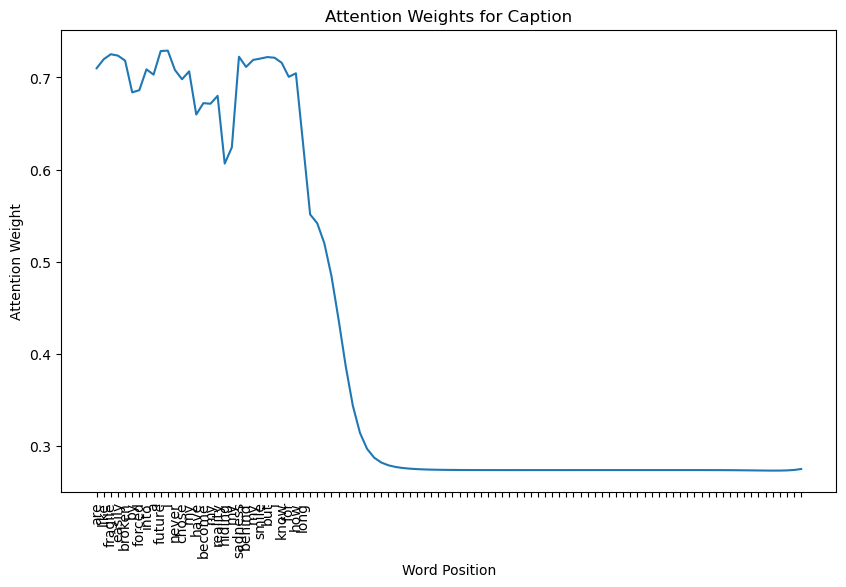

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


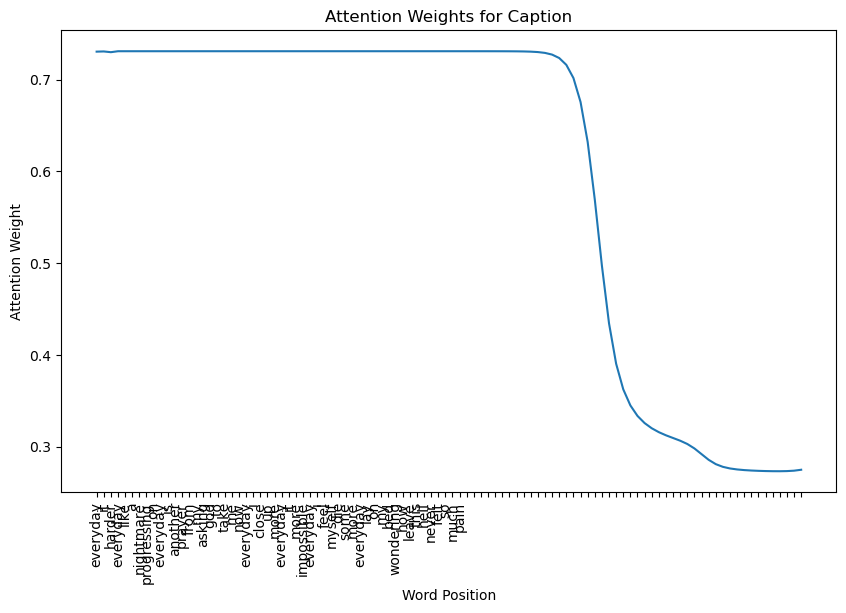

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


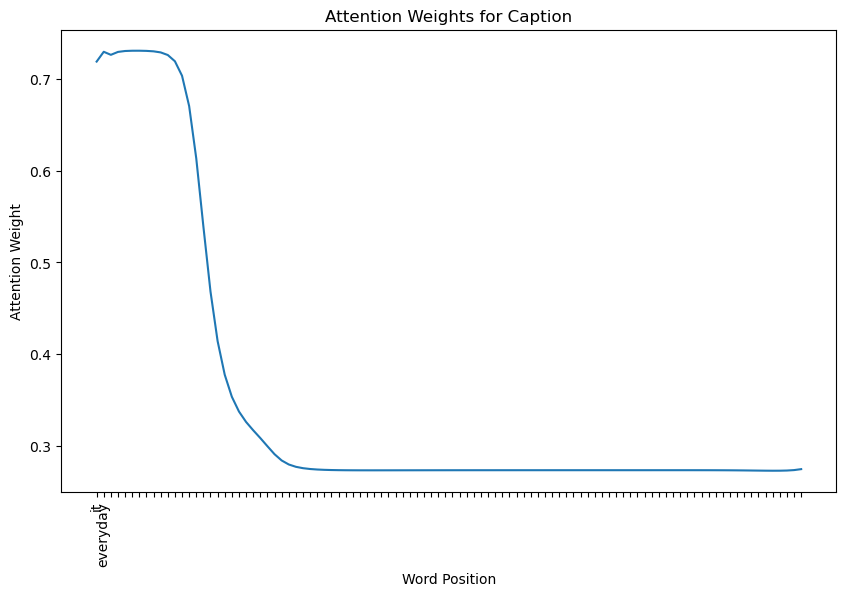

In [178]:

def plot_attention(caption, attention_weights, tokenizer, max_len):
    tokens = tokenizer.texts_to_sequences([caption])[0]
    words = [tokenizer.index_word[tok] for tok in tokens]

    if len(words) < max_len:
        words += [""] * (max_len - len(words))

    plt.figure(figsize=(10, 6))
    plt.plot(range(max_len), attention_weights, label='Attention Weights')
    plt.xticks(ticks=range(max_len), labels=words, rotation=90)
    plt.title('Attention Weights for Caption')
    plt.xlabel('Word Position')
    plt.ylabel('Attention Weight')
    plt.show()

attention_weights_layer = model.layers[-3].output  
attention_model = Model(inputs=model.input, outputs=attention_weights_layer)

for idx, row in new_df.iterrows():
    caption = row['text']
    caption_seq = tokenizer.texts_to_sequences([caption])
    caption_pad = pad_sequences(caption_seq, maxlen=max_len, padding='post')
    attention_output = attention_model.predict(caption_pad)[0]
    plot_attention(caption, attention_output, tokenizer, max_len)
